**Step 1: Import Library**

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


**Step 2: Load Dataset**

In [14]:
data = pd.read_csv("bike_price_data.csv")


print(data.head())

    brand   model  year  mileage  engine_size   price
0  BrandA  Model1  2018       45          150  300000
1  BrandB  Model2  2019       50          180  350000
2  BrandC  Model3  2020       40          125  280000
3  BrandD  Model4  2021       55          200  400000
4  BrandE  Model5  2022       60          220  450000


In [15]:
data.dropna(inplace=True)

data = pd.get_dummies(data, drop_first=True)


X = data.drop('price', axis=1).values  
y = data['price'].values


In [16]:
X

array([[2018, 45, 150, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False],
       [2019, 50, 180, True, False, False, False, False, False, False,
        True, False, False, False, False, False, False],
       [2020, 40, 125, False, True, False, False, False, False, False,
        False, True, False, False, False, False, False],
       [2021, 55, 200, False, False, True, False, False, False, False,
        False, False, True, False, False, False, False],
       [2022, 60, 220, False, False, False, True, False, False, False,
        False, False, False, True, False, False, False],
       [2023, 30, 110, False, False, False, False, True, False, False,
        False, False, False, False, True, False, False],
       [2021, 70, 130, False, False, False, False, False, True, False,
        False, False, False, False, False, True, False],
       [2020, 65, 160, False, False, False, False, False, False, True,
        False, False, False, Fa

In [17]:
y

array([300000, 350000, 280000, 400000, 450000, 250000, 320000, 370000],
      dtype=int64)

**Step3:Split the Data**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Step 4:. Feature Scaling**

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 5:Train the model**

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

**Step 6: Predict and Evalute**

In [21]:
y_pred = model.predict(X_test)


In [22]:
y_pred

array([357200., 314300.])

In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1280165000.0
R-squared: -2.2004125


**Step 7: Visualize predictions vs actual prices**

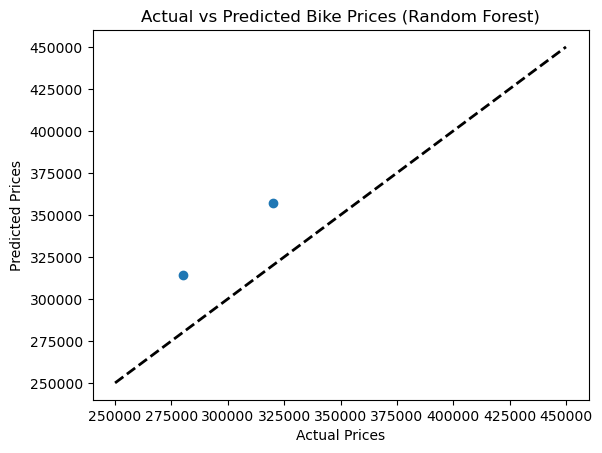

In [24]:
# Visualize predictions vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Bike Prices (Random Forest)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()
